In [33]:
from cv2 import imread,imshow
from cv2 import rectangle
from cv2 import CascadeClassifier
from cv2 import cvtColor, COLOR_BGR2RGB

from mtcnn.mtcnn import MTCNN

import matplotlib.pyplot as plt
from matplotlib.patches import Circle,Rectangle
import os

%matplotlib inline

[173  74 108 108]
[359 102 103 103]


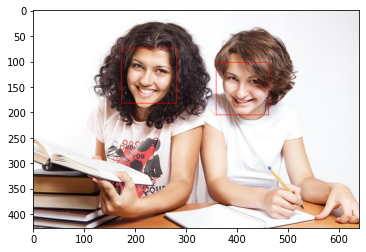

In [46]:
# Cascade Classfier
image = imread(os.path.join('..','assets','test1.jpg'))

classifier = CascadeClassifier(os.path.join('..','pretrained-models','haarcascade_frontalface_default.xml'))

# parameters: pixels,scaleFactor,minNeighbors
bboxes = classifier.detectMultiScale(pixels,1.05,6)

pixels = image
for box in bboxes:
    print(box)
    x,y,width,height = box
    x2,y2 = x + width, y + height
    rectangle(pixels,(x,y),(x2,y2),(0,0,255),1)
    
pixels = cvtColor(pixels, COLOR_BGR2RGB)    
plt.imshow(pixels)

In [53]:
def draw_patches(image,result):
    plt.imshow(image)
    ctx = plt.gca()
    
    for res in result:
        x,y,width,height = res['box']
        rect = Rectangle((x,y),width,height,fill=False,color='red')
        ctx.add_patch(rect)
        
        for key,value in res['keypoints'].items():
            dot = Circle(value,radius=2,color='red')
            ctx.add_patch(dot)
    plt.show()
    
def draw_extracted_faces(image,result):
    for i in range(len(result)):
        x1,y1,width,height = result[i]['box']
        x2,y2 = x1+width, y1+height
        plt.subplot(1,len(result),i+1)
        plt.axis('off')
        plt.imshow(image[y1:y2,x1:x2])
    plt.show()

[{'box': [185, 68, 91, 116], 'confidence': 0.9999221563339233, 'keypoints': {'left_eye': (208, 110), 'right_eye': (250, 119), 'nose': (219, 143), 'mouth_left': (200, 149), 'mouth_right': (244, 159)}}, {'box': [368, 85, 98, 128], 'confidence': 0.9593745470046997, 'keypoints': {'left_eye': (391, 130), 'right_eye': (437, 137), 'nose': (406, 165), 'mouth_left': (386, 179), 'mouth_right': (433, 185)}}]


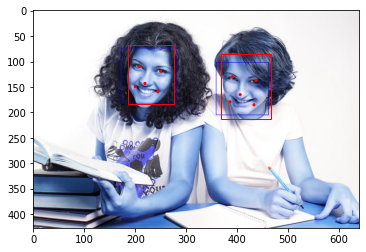

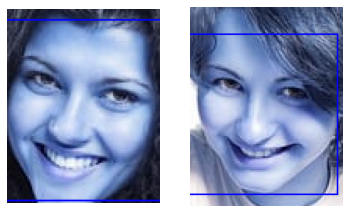

In [54]:
# MultiTask CNN  
pixels = image
detector = MTCNN()
faces = detector.detect_faces(pixels)
print(faces)
draw_patches(image,faces)
draw_extracted_faces(image,faces)